# 1) Dataset basic analysis

In [ ]:
pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 12.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df=pd.read_spss("/content/drive/MyDrive/Project Datasets/Fertility_final.sav")
df

,V025,V106,V151,V208,V213,V218,V228,V320,V404,V405,...,V605,V621,V704,V716,V730,S116,V137,V221,V525,V613
0,Rural,Primary,Male,No births,No,1.0,No,NaN,No,No,...,No,Yes,NaN,NaN,NaN,SC/ST,No children,Within 2 years,At 18 years and above,Zero Children
1,Rural,Higher,Female,No births,No,0.0,No,NaN,No,No,...,No,NaN,NaN,NaN,NaN,SC/ST,No children,NaN,Not had sex,1-2 Children
2,Rural,Secondary,Male,No births,No,0.0,Yes,NaN,No,No,...,No,Yes,NaN,NaN,NaN,SC/ST,No children,NaN,At 18 years and above,1-2 Children
3,Rural,Primary,Female,No births,No,2.0,No,<25,No,No,...,No,NaN,NaN,NaN,NaN,SC/ST,No children,Within 2 years,At 18 years and above,1-2 Children
4,Rural,Secondary,Male,No births,No,3.0,No,NaN,No,No,...,No,No,NaN,NaN,NaN,OBC,No children,Within 2 years,At 18 years and above,More than 2 children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,Urban,Secondary,Male,No births,No,2.0,No,25-29,No,No,...,No,NaN,NaN,NaN,NaN,OBC,No children,Within 2 years,Before 18,1-2 Children
3267,Urban,Secondary,Male,No births,No,1.0,No,NaN,No,No,...,No,Yes,NaN,NaN,NaN,OBC,1-2 children,5 years ans more,At 18 years and above,1-2 Children
3268,Urban,Secondary,Female,No births,No,2.0,No,NaN,No,No,...,No,Yes,NaN,NaN,NaN,General,1-2 children,Within 4 years,At 18 years and above,1-2 Children
3269,Urban,Higher,Male,No births,No,0.0,No,NaN,No,No,...,No,No,NaN,NaN,NaN,OBC,1-2 children,NaN,At 18 years and above,Zero Children


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   V025      3271 non-null   category
 1   V106      3271 non-null   category
 2   V151      3271 non-null   category
 3   V208      3271 non-null   category
 4   V213      3271 non-null   category
 5   V218      3271 non-null   float64 
 6   V228      3271 non-null   category
 7   V320      375 non-null    category
 8   V404      3271 non-null   category
 9   V405      3271 non-null   category
 10  V406      3271 non-null   category
 11  V625      3271 non-null   category
 12  S234      61 non-null     category
 13  S253      187 non-null    category
 14  S711      3271 non-null   category
 15  S720      3271 non-null   category
 16  S728A     3271 non-null   category
 17  S728B     3271 non-null   category
 18  S728C     3271 non-null   category
 19  S728D     3271 non-null   category
 20  V_130   

# 1.1 Changing the variable names from code to the original names

In [ ]:
# Read the dataset and metadata
df, meta = pyreadstat.read_sav("/content/drive/MyDrive/Project Datasets/Fertility_final.sav")
#the metadata contains information like variable labels , values of categories etc.

In [ ]:
# Print variable labels
for var, label in zip(meta.column_names, meta.column_labels):
    print(f"'{var}': '{label}'")

#zip() pairs up two sequences element by element.
#this is a for loop that assigns varaible names(var) from the metadata convert the code to correct variable name like wealth index,age etc.
#also this for loop assigns label that converts the categories into the coded format using the metadata like no to 0 and yes is coverted to 1 like that.

'V025': 'Type of place of residence'
'V106': 'Highest educational level'
'V151': 'Sex of household head'
'V208': 'Births in last five years'
'V213': 'Currently pregnant'
'V218': 'Number of living children'
'V228': 'Ever had a terminated pregnancy'
'V320': 'Age at sterilization'
'V404': 'Currently breastfeeding'
'V405': 'Currently amenorrheic[no menstrual cycle]'
'V406': 'Currently abstaining[no intercourse]'
'V625': 'Exposure to pregnancy'
'S234': 'Pregnancy end in miscarriage, abortion, or stillbirth'
'S253': 'Had your uterus removed'
'S711': 'Smoking status'
'S720': 'Do you drink alcohol'
'S728A': 'Currently has diabetes'
'S728B': 'Currently has hypertension'
'S728C': 'Currently has a chronic respiratory disease including asthma'
'S728D': 'Currently has thyroid disorder'
'V_130': 'Religion'
'V_136': 'Number of household members'
'V_161': 'Type of cooking fuel'
'V_190': 'Wealth Index'
'V_212': 'Age at first birth'
'V_447A': 'Age of woman'
'V_501': 'Marital status'
'V_307$01': 'Contrac

In [ ]:
# Assign variable labels to dataframe columns
df.rename(columns=dict(zip(meta.column_names, meta.column_labels)), inplace=True)
df

#the df is renamed with the metadata's column name and column label.

,Type of place of residence,Highest educational level,Sex of household head,Births in last five years,Currently pregnant,Number of living children,Ever had a terminated pregnancy,Age at sterilization,Currently breastfeeding,Currently amenorrheic[no menstrual cycle],...,Desire for more children,Husbands desire for children,Husband/partner occupation,Respondents occupation,Husband/partner age,Caste,Number of children 5 and under in household,Marriage to first birth interval,Age at first sex,Ideal number of children
0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,...,0.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0,3.0,1.0
1,2.0,3.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,2.0
2,2.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,...,0.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,3.0,2.0
3,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,3.0,2.0
4,2.0,2.0,1.0,0.0,0.0,3.0,0.0,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,2.0,1.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,2.0
3267,1.0,2.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,...,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0,3.0,2.0
3268,1.0,2.0,2.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,...,0.0,1.0,NaN,NaN,NaN,3.0,2.0,3.0,3.0,2.0
3269,1.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,2.0,2.0,NaN,3.0,1.0


# 2) Preprocessing

# 2.1 Checking of duplicates

In [ ]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns.tolist())

Duplicate columns: []


In [ ]:
df = df.loc[:, ~df.columns.duplicated()]
#if there are duplicate columns this code is used to keep the first column and the remaining duplicate columns are removed.

# 2.2 Checking of missing values and visualization

In [ ]:
#summary of missing values
missing_summary=df.isna().sum()
missing_summary

,0
Type of place of residence,0
Highest educational level,0
Sex of household head,0
Births in last five years,0
Currently pregnant,0
Number of living children,0
Ever had a terminated pregnancy,0
Age at sterilization,2896
Currently breastfeeding,0
Currently amenorrheic[no menstrual cycle],0


In [ ]:
#calculate missing percentage
missing_percentage = (missing_summary / len(df)) * 100
missing_percentage

,0
Type of place of residence,0.000000
Highest educational level,0.000000
Sex of household head,0.000000
Births in last five years,0.000000
Currently pregnant,0.000000
Number of living children,0.000000
Ever had a terminated pregnancy,0.000000
Age at sterilization,88.535616
Currently breastfeeding,0.000000
Currently amenorrheic[no menstrual cycle],0.000000


In [ ]:
# Combine into a dataframe for better readability
missing_info = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)                      #created a df with missing value's count and percentage
missing_info

,Missing Count,Missing Percentage
"Pregnancy end in miscarriage, abortion, or stillbirth",3210,98.135127
Had your uterus removed,3084,94.283094
Husband/partner age,2952,90.247631
Husband/partner occupation,2926,89.452767
Husband/Partner education,2926,89.452767
Age at sterilization,2896,88.535616
Respondents occupation,2765,84.530725
Wanted last child,2702,82.604708
Husbands desire for children,1486,45.429532
Marriage to first birth interval,1207,36.900031


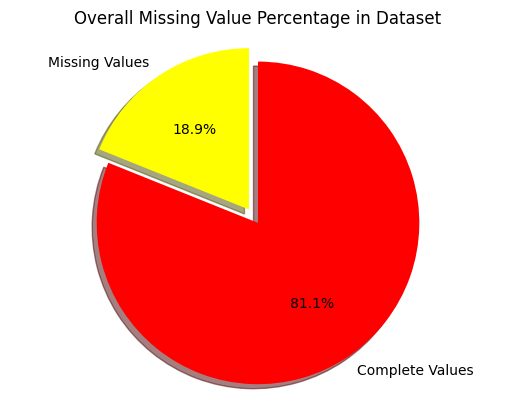

In [ ]:
# Calculate the total number of values in the DataFrame
total_values = df.size
#total_values = 147195

# Calculate the total number of missing values
total_missing = df.isnull().sum().sum()
#total_missing = 27850

# Calculate the percentage of missing values
percentage_missing = (total_missing / total_values) * 100
#percentage_missing = 18.92%

# Create the pie chart
labels = ['Missing Values', 'Complete Values']
sizes = [percentage_missing, 100 - percentage_missing]
colors = ['yellow','red']
explode = (0.1, 0)  # explode the 1st slice
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Overall Missing Value Percentage in Dataset')
plt.show()


<ipython-input-14-fda5df7836e3>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_slices).colors


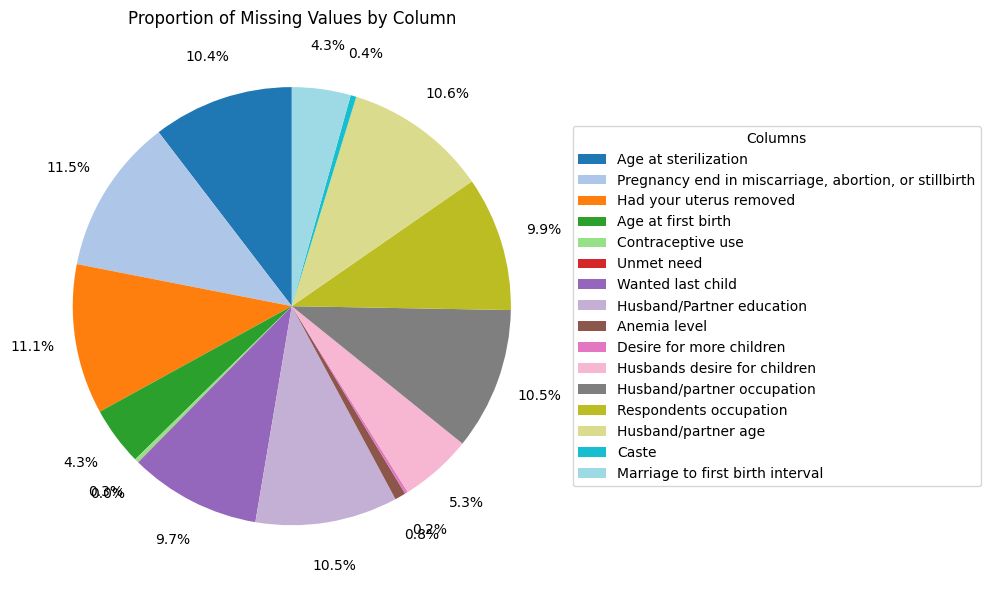

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Filter out columns with no missing values
missing_values = missing_summary[missing_summary > 0]

# Dynamically generate enough distinct colors
num_slices = len(missing_values)
colors = cm.get_cmap('tab20', num_slices).colors

plt.figure(figsize=(10, 6))

# Pie with external percentage text, no labels
wedges, texts, autotexts = plt.pie(
    missing_values,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    pctdistance=1.2,
    textprops={'fontsize': 10}
)

# Legend with variable names
plt.legend(
    wedges,
    missing_values.index,
    title="Columns",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Proportion of Missing Values by Column")
plt.tight_layout()
plt.show()



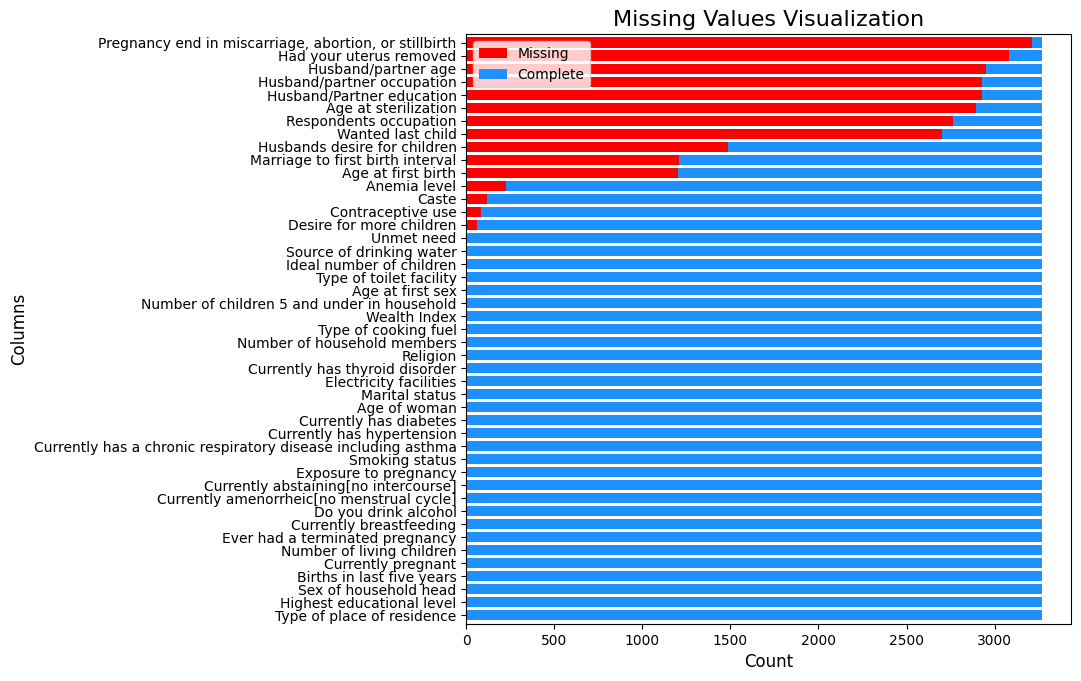

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate missing and complete counts per column
missing = df.isnull().sum()
complete = df.notnull().sum()

# Step 2: Combine into a single DataFrame
data = pd.DataFrame({
    'Missing': missing,
    'Complete': complete
})

# Step 3: Plot horizontal stacked bar chart
plt.figure(figsize=(12, 8))  # Increase figure size for better spacing
data.sort_values('Missing').plot(
    kind='barh',
    stacked=True,
    color=['red', 'dodgerblue'],
    width=0.8,
    ax=plt.gca()  # Use current axis to respect figsize
)

# Final styling
plt.title("Missing Values Visualization", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0, fontsize=10)

# Add padding to labels if necessary
plt.tight_layout(pad=5.0)  # Add more padding

plt.show()


<Figure size 1200x600 with 0 Axes>

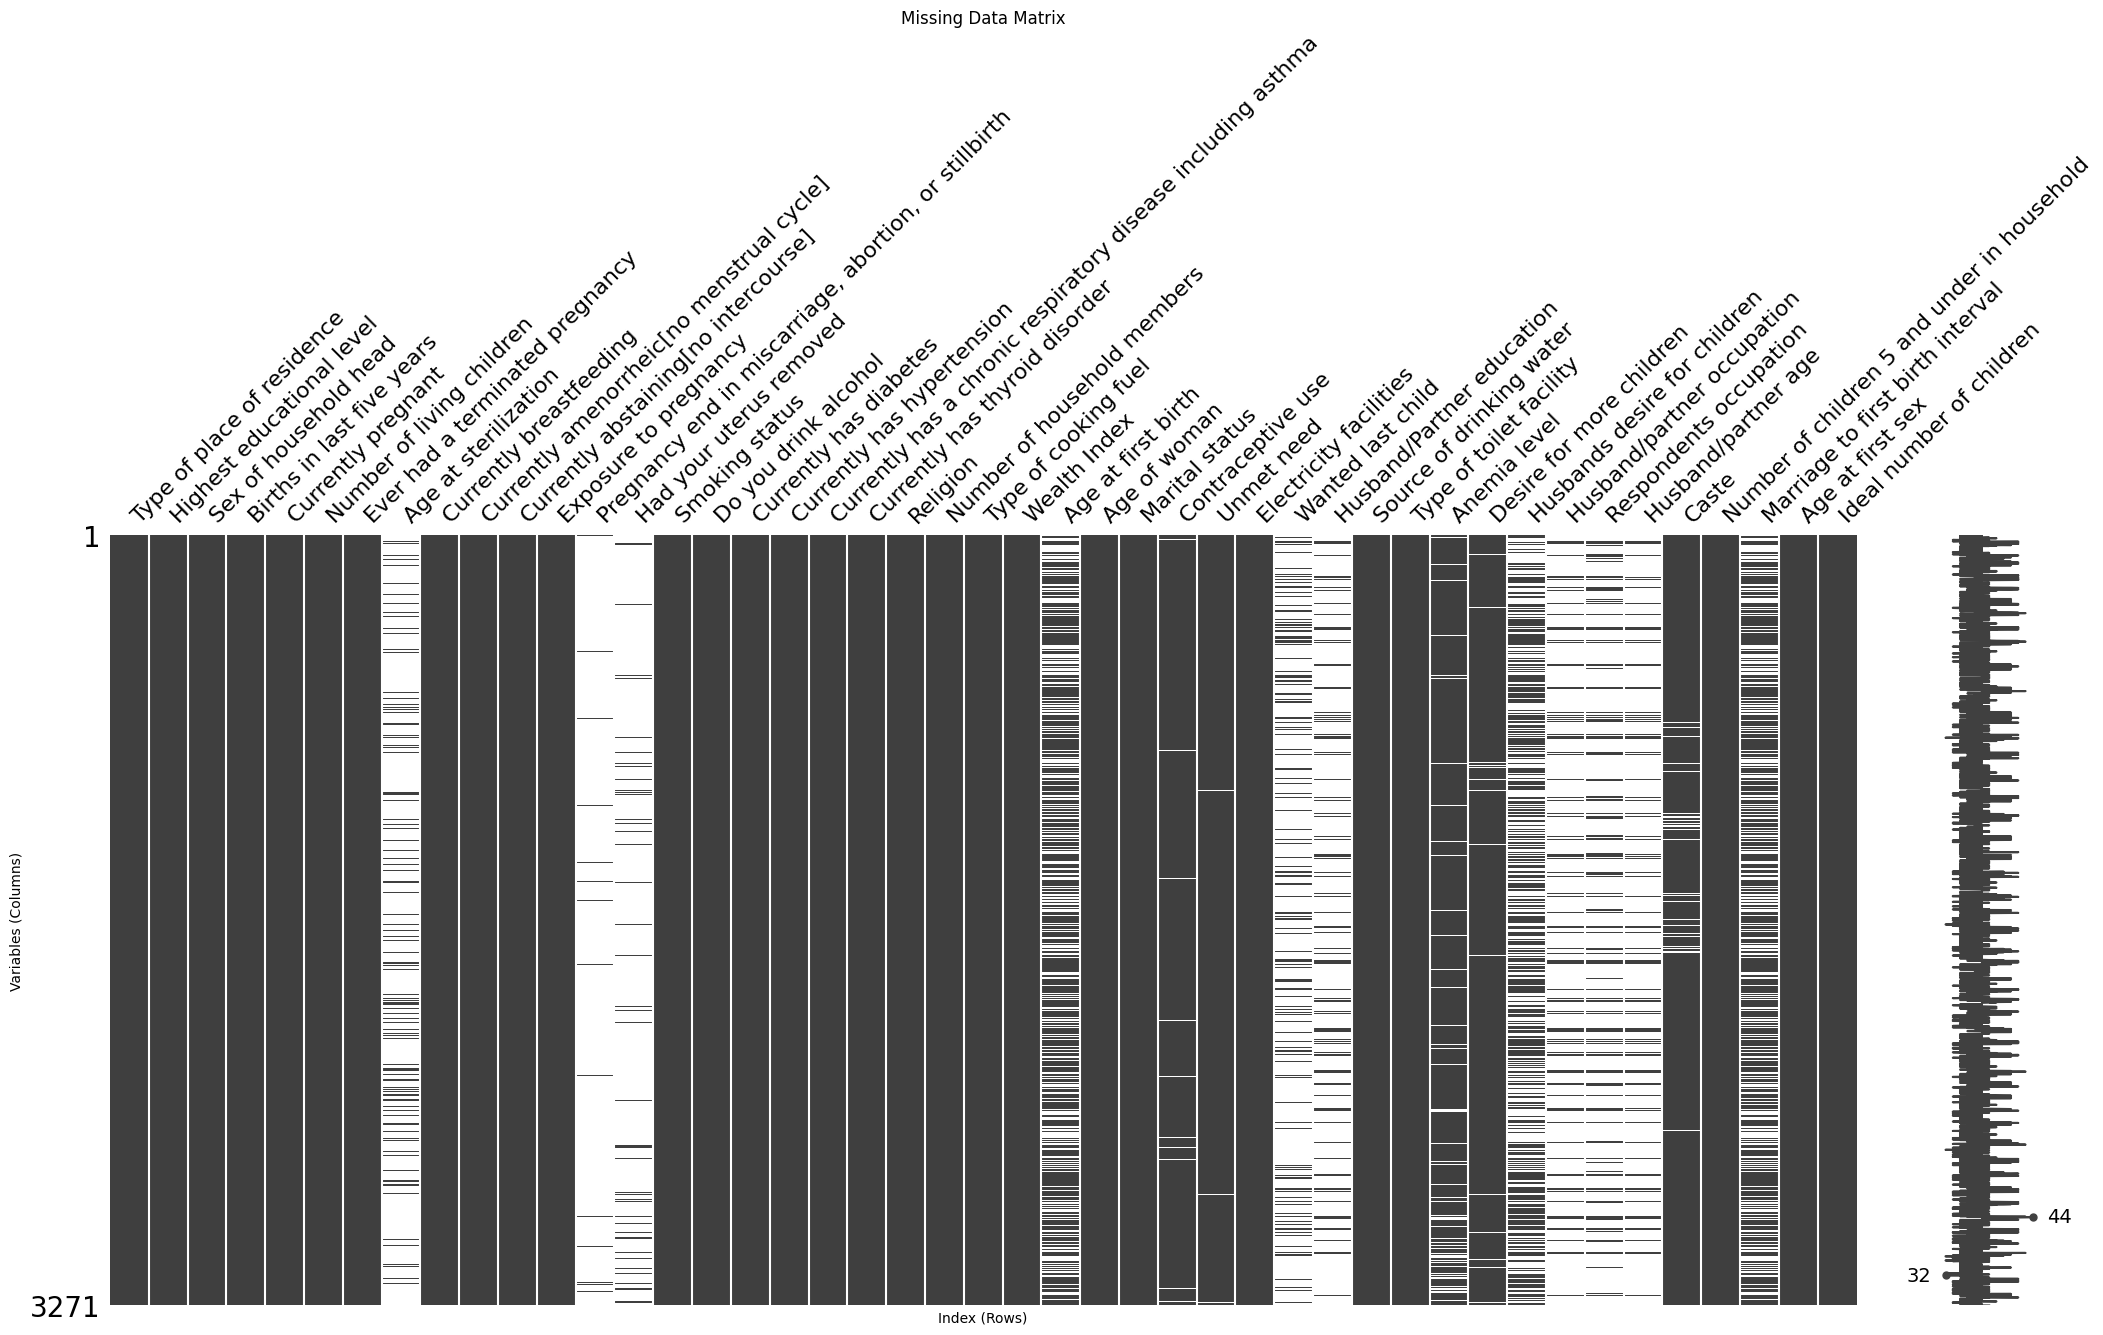

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Visualize missing values with axis labels
ax = msno.matrix(df)
plt.xlabel("Index (Rows)")
plt.ylabel("Variables (Columns)")
plt.title("Missing Data Matrix")

# Show the plot
plt.show()


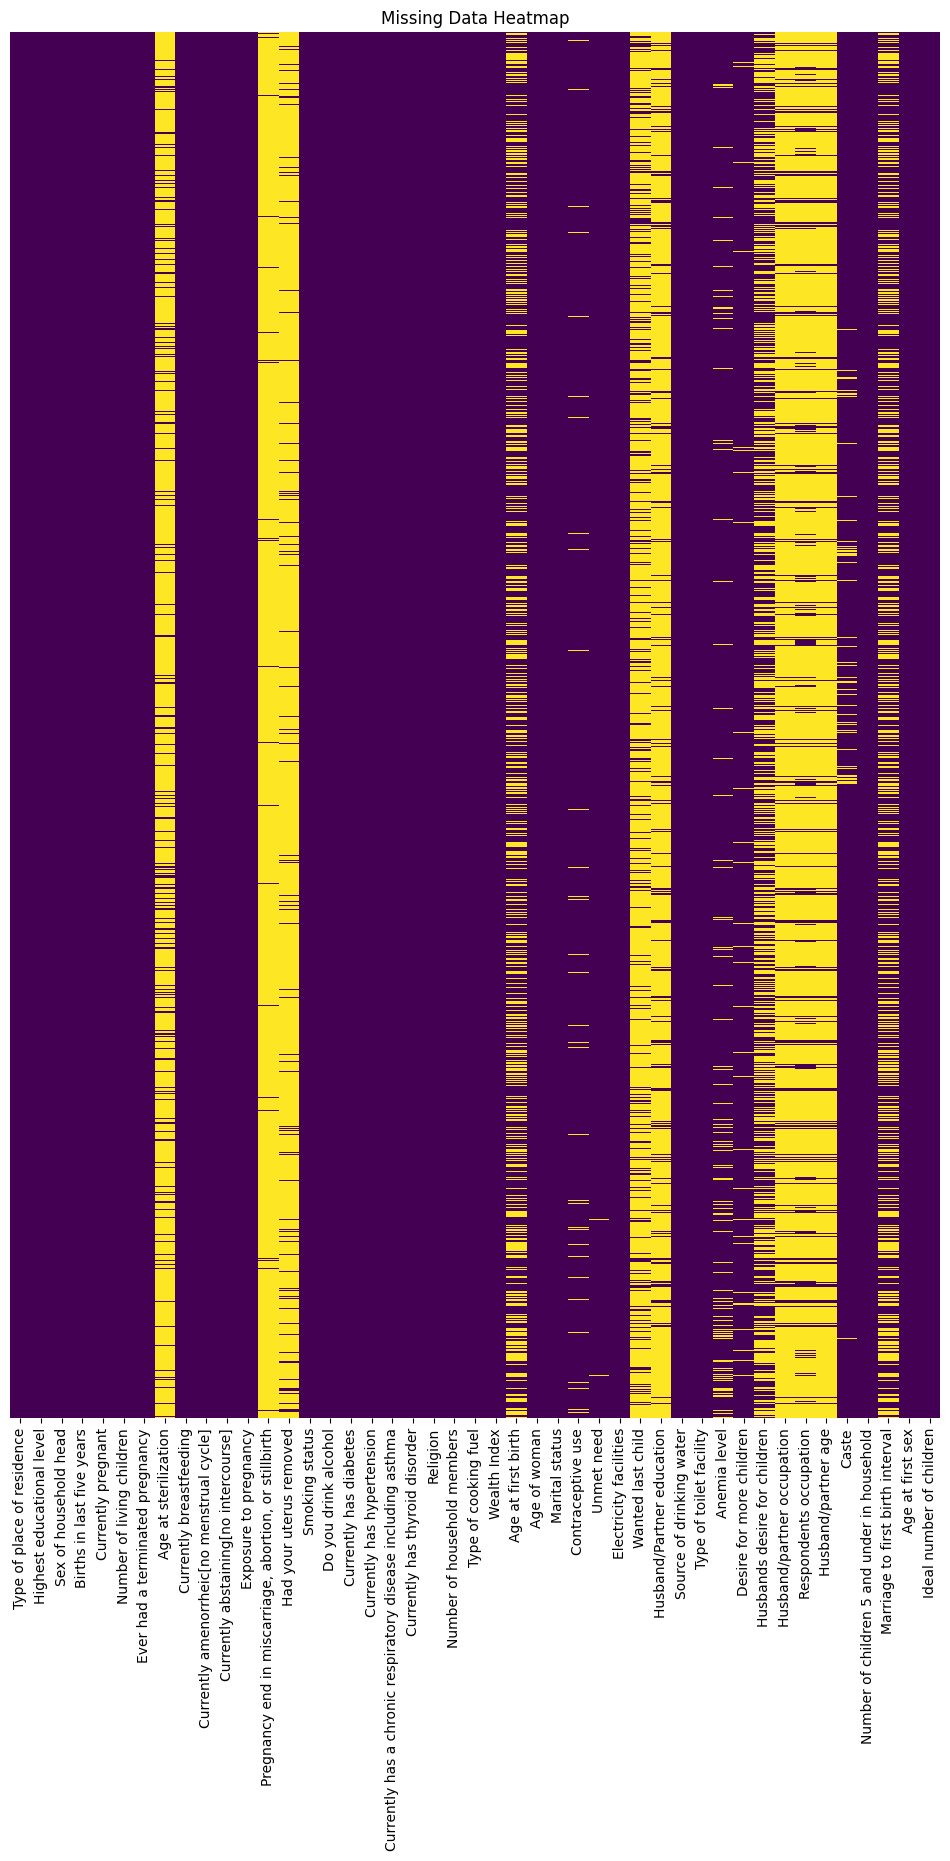

In [ ]:
#Heatmap of Missing Values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,18))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


<Figure size 1000x600 with 0 Axes>

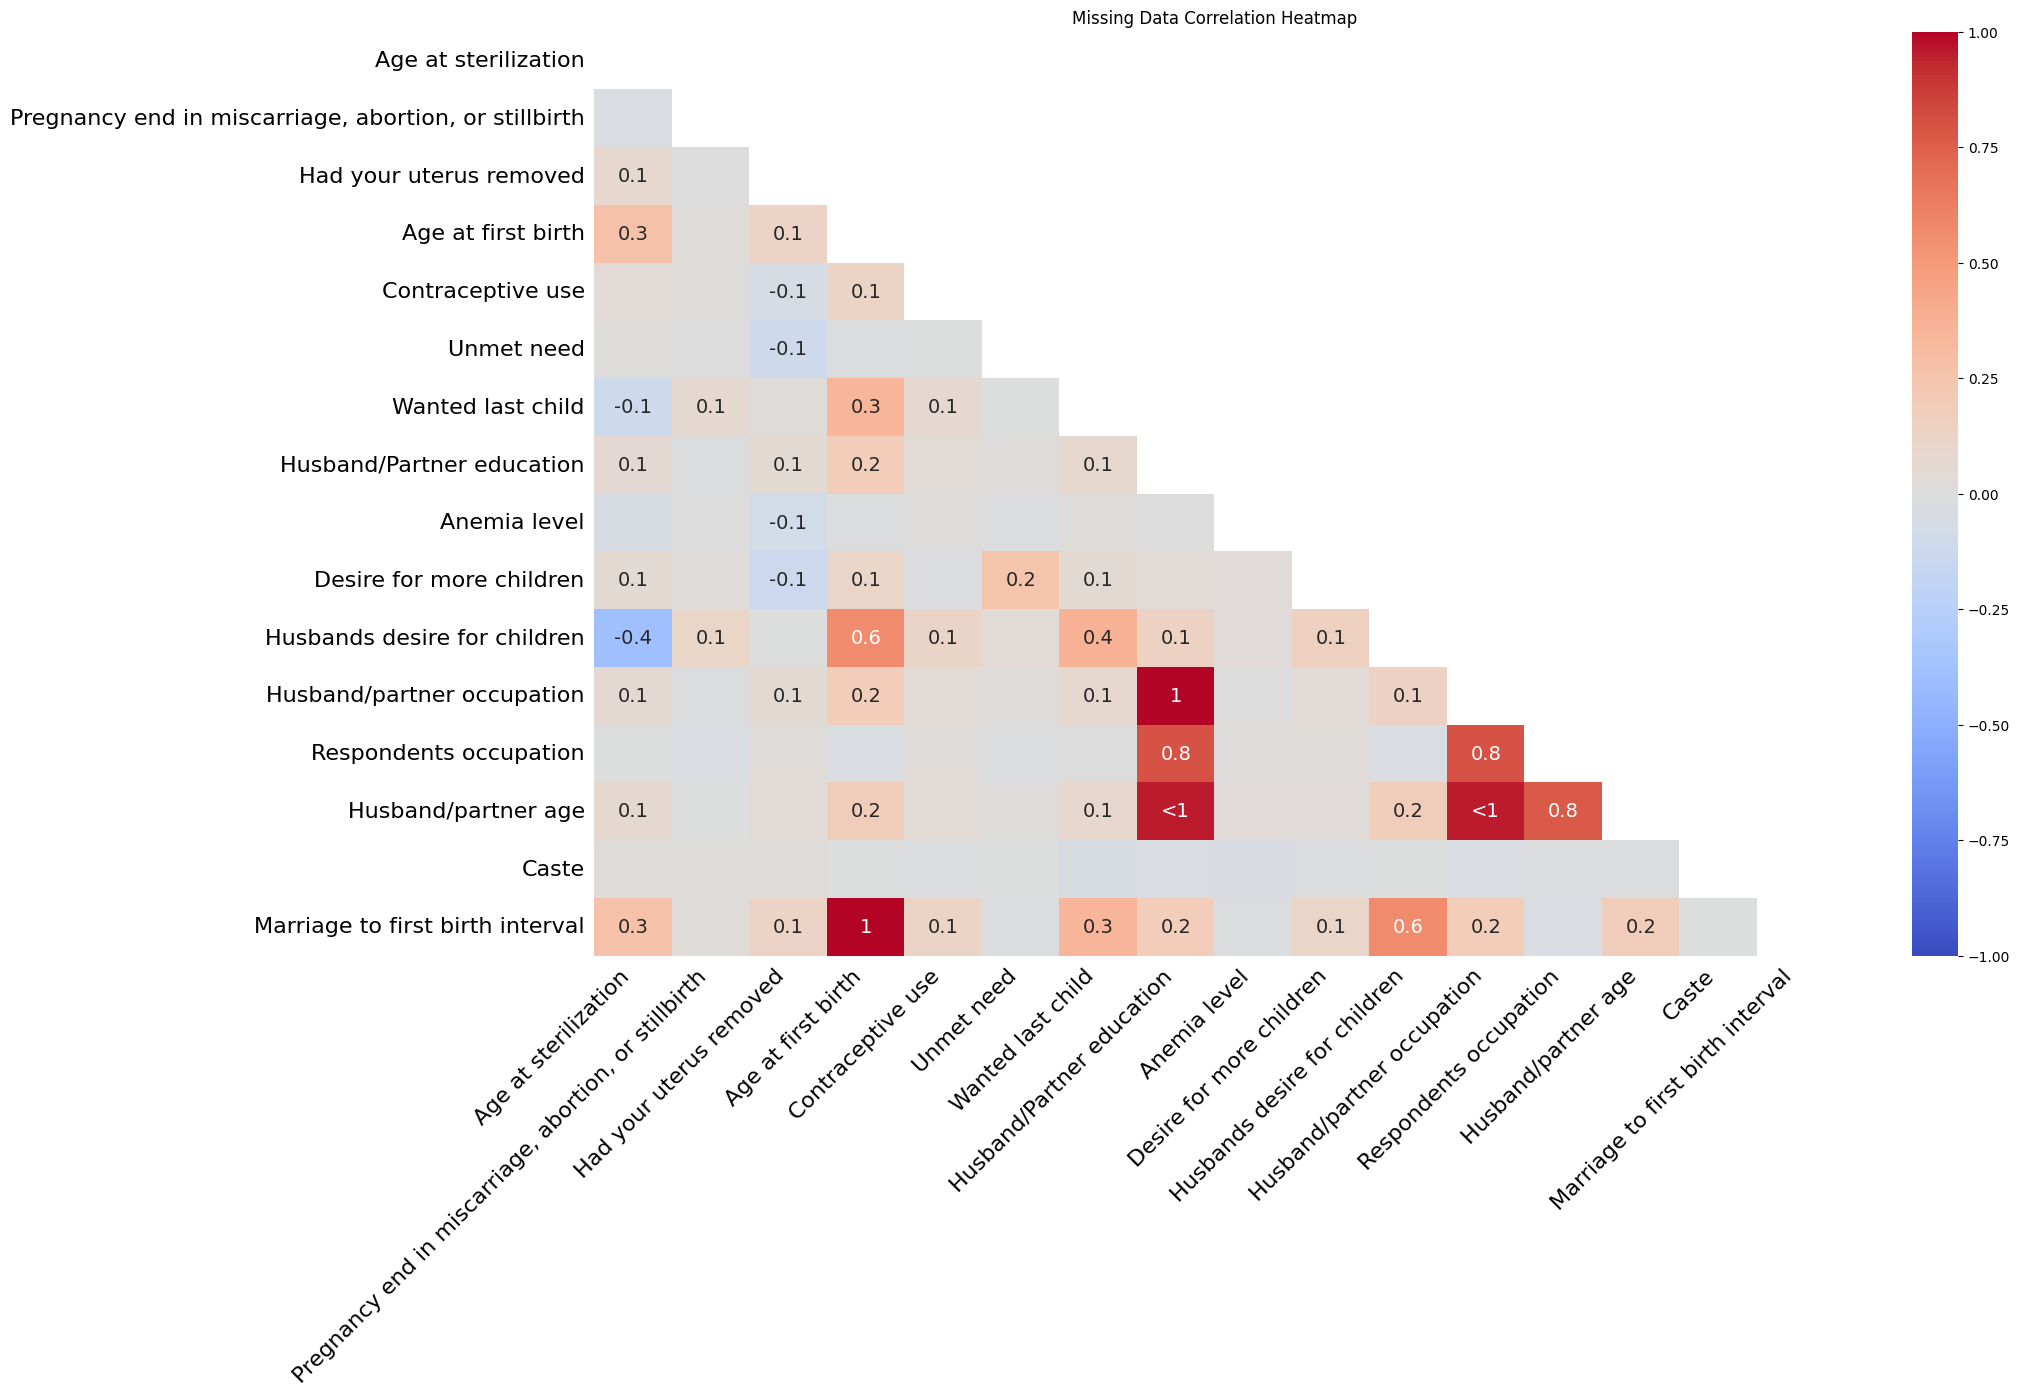

In [ ]:
# Heatmap to check missing data correlation
plt.figure(figsize=(10, 6))
msno.heatmap(df, cmap="coolwarm")
plt.title("Missing Data Correlation Heatmap")
plt.show()

<Axes: >

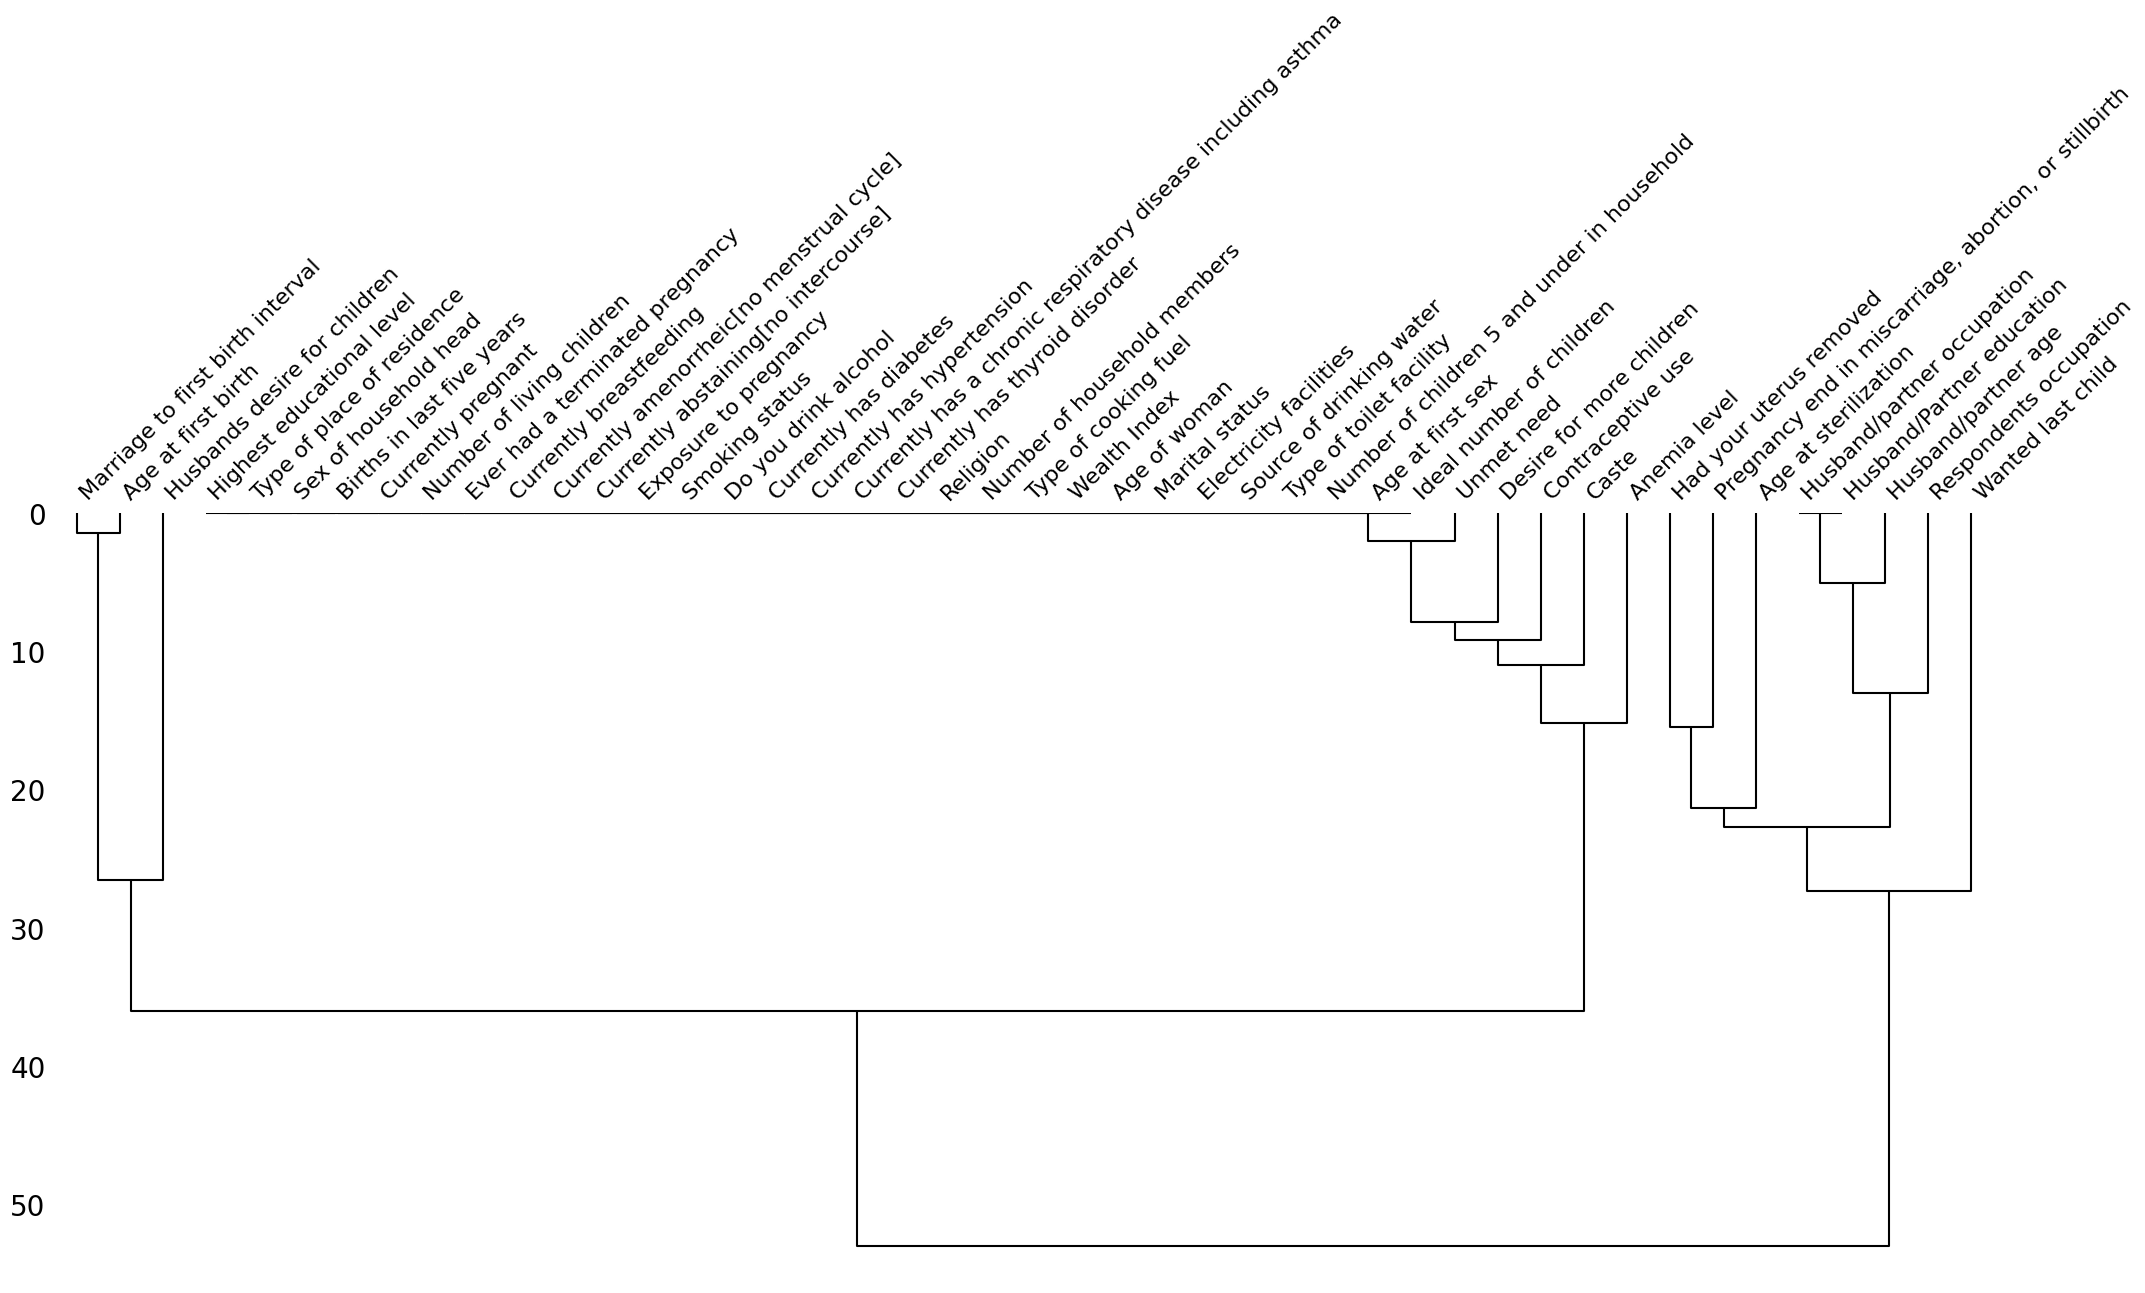

In [ ]:
import missingno as msno
msno.dendrogram(df)

In [ ]:
# Filter only variables with missing data
missing_info = missing_info[missing_info['Missing Count'] > 0]
missing_info

,Missing Count,Missing Percentage
"Pregnancy end in miscarriage, abortion, or stillbirth",3210,98.135127
Had your uterus removed,3084,94.283094
Husband/partner age,2952,90.247631
Husband/partner occupation,2926,89.452767
Husband/Partner education,2926,89.452767
Age at sterilization,2896,88.535616
Respondents occupation,2765,84.530725
Wanted last child,2702,82.604708
Husbands desire for children,1486,45.429532
Marriage to first birth interval,1207,36.900031


# 2.3 Missing value classification
  

# 2.3.1 MCAR

Here used chi square test for MCAR test If p > 0.05, the data is MCAR.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Initialize storage
mcar_columns = []
mcar_results = []

# Treat all columns as categorical
cat_cols = df.columns.tolist()

# Loop through each column with missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_mask = df[col].isnull()
        mcar = True
        min_p = 1.0  # To track the smallest p-value seen

        for other_col in df.columns:
            if other_col == col:
                continue

            try:
                # Chi-square test between missingness of `col` and values of `other_col`
                contingency_table = pd.crosstab(df[other_col], missing_mask)
                if contingency_table.shape[0] > 1 and contingency_table.shape[1] == 2:
                    chi2, p, _, _ = chi2_contingency(contingency_table)
                    min_p = min(min_p, p)
                    if p < 0.05:
                        mcar = False
                        break
            except Exception as e:
                continue

        # Store result
        if mcar:
            mcar_columns.append(col)

        mcar_results.append({
            'Variable': col,
            'Min_P_Value': round(min_p, 4),
            'MCAR': mcar
        })

# Create results DataFrame
mcar_df = pd.DataFrame(mcar_results)

# Output
print("\n📊 MCAR Test Summary Table:\n")
print(mcar_df)

print("\n✅ Final Columns Likely MCAR (Missing Completely At Random):")
print(mcar_columns)



📊 MCAR Test Summary Table:

                                             Variable  Min_P_Value   MCAR
0                                Age at sterilization       0.0000  False
1   Pregnancy end in miscarriage, abortion, or sti...       0.0001  False
2                             Had your uterus removed       0.0012  False
3                                  Age at first birth       0.0011  False
4                                   Contraceptive use       0.0010  False
5                                          Unmet need       0.0005  False
6                                   Wanted last child       0.0104  False
7                           Husband/Partner education       0.0000  False
8                                        Anemia level       0.0000  False
9                            Desire for more children       0.0002  False
10                       Husbands desire for children       0.0000  False
11                         Husband/partner occupation       0.0000  False
12       

# 2.3.2 MAR

Logistic regression is used based on AUC score the missing value is classified to MAR or not. if ROC-AUC score > 0.6 then it is MAR.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

print("\n📌 Detecting MAR Variables Using Logistic Regression with AUC Threshold...\n")

threshold_auc = 0.6
roc_auc_results = []

# Create missingness indicators
missing_indicators = df.isnull().astype(int)

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"\n🔍 MAR check for: {col}")
        target = missing_indicators[col]  # 1 = missing, 0 = not missing

        # Prepare predictors
        predictors = df.drop(columns=[col])
        predictors_num = predictors.select_dtypes(include=[np.number])

        if predictors_num.shape[1] < 2:
            print("⚠️ Skipping: Not enough numeric predictors")
            continue

        imputer = SimpleImputer(strategy='mean')
        predictors_imputed = pd.DataFrame(
            imputer.fit_transform(predictors_num),
            columns=predictors_num.columns,
            index=predictors_num.index
        )

        aligned_target = target.loc[predictors_imputed.index]

        try:
            X_train, X_test, y_train, y_test = train_test_split(
                predictors_imputed, aligned_target, test_size=0.3, random_state=42
            )

            model = LogisticRegression(max_iter=1000)
            model.fit(X_train, y_train)
            y_pred = model.predict_proba(X_test)[:, 1]

            auc = roc_auc_score(y_test, y_pred)
            classification = "Likely MAR" if auc > threshold_auc else "Not MAR"
            print(f"ROC AUC = {auc:.3f} ➤ {classification}")

            # Store results
            roc_auc_results.append({
                "Variable": col,
                "ROC_AUC": round(auc, 3),
                "Classification": classification
            })

        except Exception as e:
            print(f"⚠️ Skipped due to error: {e}")

# Create result table
mar_table = pd.DataFrame(roc_auc_results).sort_values(by="ROC_AUC", ascending=False)

print("\n📋 Summary Table of ROC-AUC Scores for Missingness Detection:")
print(mar_table.to_string(index=False))



📌 Detecting MAR Variables Using Logistic Regression with AUC Threshold...


🔍 MAR check for: Age at sterilization
ROC AUC = 0.935 ➤ Likely MAR

🔍 MAR check for: Pregnancy end in miscarriage, abortion, or stillbirth
ROC AUC = 0.991 ➤ Likely MAR

🔍 MAR check for: Had your uterus removed
ROC AUC = 0.951 ➤ Likely MAR

🔍 MAR check for: Age at first birth
ROC AUC = 1.000 ➤ Likely MAR

🔍 MAR check for: Contraceptive use
ROC AUC = 0.829 ➤ Likely MAR

🔍 MAR check for: Unmet need
ROC AUC = 0.549 ➤ Not MAR

🔍 MAR check for: Wanted last child
ROC AUC = 1.000 ➤ Likely MAR

🔍 MAR check for: Husband/Partner education
ROC AUC = 0.677 ➤ Likely MAR

🔍 MAR check for: Anemia level
ROC AUC = 0.627 ➤ Likely MAR

🔍 MAR check for: Desire for more children
ROC AUC = 1.000 ➤ Likely MAR

🔍 MAR check for: Husbands desire for children
ROC AUC = 0.952 ➤ Likely MAR

🔍 MAR check for: Husband/partner occupation
ROC AUC = 0.683 ➤ Likely MAR

🔍 MAR check for: Respondents occupation
ROC AUC = 0.494 ➤ Not MAR

🔍 MAR chec

In [ ]:
print("\n📌 Finding Variables Related to Missingness...\n")

related_vars_results = []

for col in df.columns:
    if df[col].isnull().sum() > 0:
        target = missing_indicators[col]

        predictors = df.drop(columns=[col])
        predictors_num = predictors.select_dtypes(include=[np.number])

        if predictors_num.shape[1] < 2:
            continue

        imputer = SimpleImputer(strategy='mean')
        predictors_imputed = pd.DataFrame(
            imputer.fit_transform(predictors_num),
            columns=predictors_num.columns,
            index=predictors_num.index
        )

        aligned_target = target.loc[predictors_imputed.index]

        try:
            model = LogisticRegression(max_iter=1000)
            model.fit(predictors_imputed, aligned_target)

            coeff_df = pd.DataFrame({
                "Variable": predictors_imputed.columns,
                "Coefficient": model.coef_[0]
            })
            coeff_df["Abs_Coeff"] = coeff_df["Coefficient"].abs()
            top_predictors = coeff_df.sort_values(by="Abs_Coeff", ascending=False).head(5)

            related_vars_results.append({
                "Missing_Variable": col,
                "Top_Related_Variables": top_predictors["Variable"].tolist(),
                "Coefficients": top_predictors["Coefficient"].round(3).tolist()
            })

        except Exception as e:
            print(f"⚠️ Skipped {col} due to error: {e}")

# Display in readable format
print("\n📎 Top Related Variables Driving Missingness:\n")
for result in related_vars_results:
    print(f"🔹 {result['Missing_Variable']}:")
    for var, coef in zip(result['Top_Related_Variables'], result['Coefficients']):
        print(f"   ➤ {var} (coef = {coef})")
    print()



📌 Finding Variables Related to Missingness...


📎 Top Related Variables Driving Missingness:

🔹 Age at sterilization:
   ➤ Contraceptive use (coef = 3.977)
   ➤ Desire for more children (coef = 2.704)
   ➤ Currently amenorrheic[no menstrual cycle] (coef = -1.394)
   ➤ Unmet need (coef = 1.058)
   ➤ Age of woman (coef = -1.024)

🔹 Pregnancy end in miscarriage, abortion, or stillbirth:
   ➤ Ever had a terminated pregnancy (coef = -6.319)
   ➤ Age of woman (coef = 1.423)
   ➤ Age at sterilization (coef = -0.828)
   ➤ Husband/partner age (coef = 0.77)
   ➤ Source of drinking water (coef = 0.731)

🔹 Had your uterus removed:
   ➤ Exposure to pregnancy (coef = -2.09)
   ➤ Currently breastfeeding (coef = -1.656)
   ➤ Pregnancy end in miscarriage, abortion, or stillbirth (coef = -1.351)
   ➤ Currently amenorrheic[no menstrual cycle] (coef = -1.351)
   ➤ Marital status (coef = 1.265)

🔹 Age at first birth:
   ➤ Number of living children (coef = -7.158)
   ➤ Births in last five years (coef = -2.

# 2.3.3 MNAR

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Your dataframe: df
mnar_vars = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        if df[col].isnull().sum() > 0:
            try:
                df_temp = df[[col]].copy()
                df_temp['missing_flag'] = df_temp[col].isnull().astype(int)

                # Keep only non-missing rows for self-predictive check
                non_missing = df_temp[df_temp['missing_flag'] == 0]

                # One-hot encode the non-missing values of the categorical column
                X = pd.get_dummies(non_missing[col], drop_first=True)
                y = non_missing['missing_flag']

                # Add constant and fit logistic regression
                X = sm.add_constant(X)
                model = sm.Logit(y, X).fit(disp=0)
                pvals = model.pvalues[1:]  # exclude constant

                if (pvals < 0.05).any():
                    print(f"🔴 {col}: Likely MNAR (p < 0.05)")
                    mnar_vars.append(col)
                else:
                    print(f"🟢 {col}: Not strongly MNAR")

            except Exception as e:
                print(f"⚠️ Skipped {col} due to error: {e}")

print("\n📋 Final MNAR candidates (categorical):")
print(mnar_vars if mnar_vars else "No strong MNAR variables detected.")



📋 Final MNAR candidates (categorical):
No strong MNAR variables detected.


# 2.4 Identifying variables having missing percentage more than 10

In [ ]:
# Filter variables with more than 10% missing data
high_missing_vars = missing_info[missing_info['Missing Percentage'] > 10]

# Optional: Extract just the variable names
#high_missing_var_names = high_missing_vars.index.tolist()

# Display the filtered DataFrame
print(high_missing_vars)

                                                    Missing Count  \
Pregnancy end in miscarriage, abortion, or stil...           3210   
Had your uterus removed                                      3084   
Husband/partner age                                          2952   
Husband/partner occupation                                   2926   
Husband/Partner education                                    2926   
Age at sterilization                                         2896   
Respondents occupation                                       2765   
Wanted last child                                            2702   
Husbands desire for children                                 1486   
Marriage to first birth interval                             1207   
Age at first birth                                           1205   

                                                    Missing Percentage  
Pregnancy end in miscarriage, abortion, or stil...           98.135127  
Had your uterus removed  

# 2.5 Analyzing the target variable:Number of living children

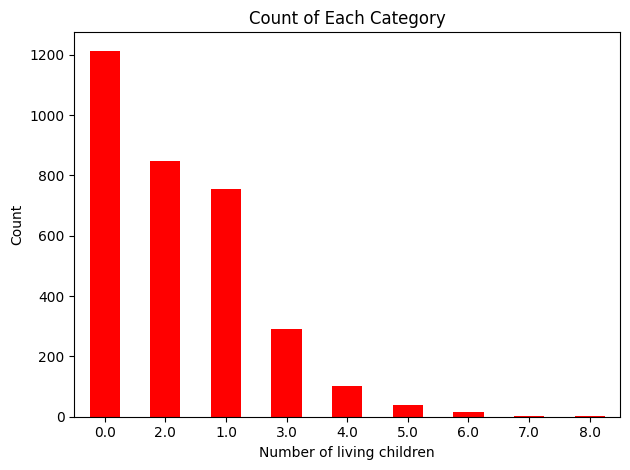

In [ ]:
#check the balance of the target variable Number of living children
x= df['Number of living children']
x_series=pd.Series(x)
counts = x_series.value_counts()
counts.plot(kind='bar', color='red')
plt.xlabel("Number of living children")
plt.ylabel("Count")
plt.title("Count of Each Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
y=df['Number of living children']
print("Summary of target variable:")
print(y.describe())

print("\nValue counts:")
print(y.value_counts().sort_index())
#negtive binomial dbn

Summary of target variable:
count    3271.000000
mean        1.239071
std         1.252160
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Number of living children, dtype: float64

Value counts:
Number of living children
0.0    1214
1.0     756
2.0     849
3.0     292
4.0     102
5.0      38
6.0      16
7.0       3
8.0       1
Name: count, dtype: int64


In [ ]:
print("Variance:", y.var())

Variance: 1.5679042124424059


# 3) Feature selection for the missing value containing data

# 3.1 Random forest feature importance

Age at first birth                  0.495946
Marriage to first birth interval    0.122977
Ideal number of children            0.063568
Unmet need                          0.054950
Number of household members         0.026091
Age of woman                        0.023070
Age at sterilization                0.019613
Highest educational level           0.017147
Anemia level                        0.014336
Religion                            0.013532
Caste                               0.012488
Wealth Index                        0.011883
Contraceptive use                   0.010123
Type of cooking fuel                0.010026
Age at first sex                    0.008502
dtype: float64


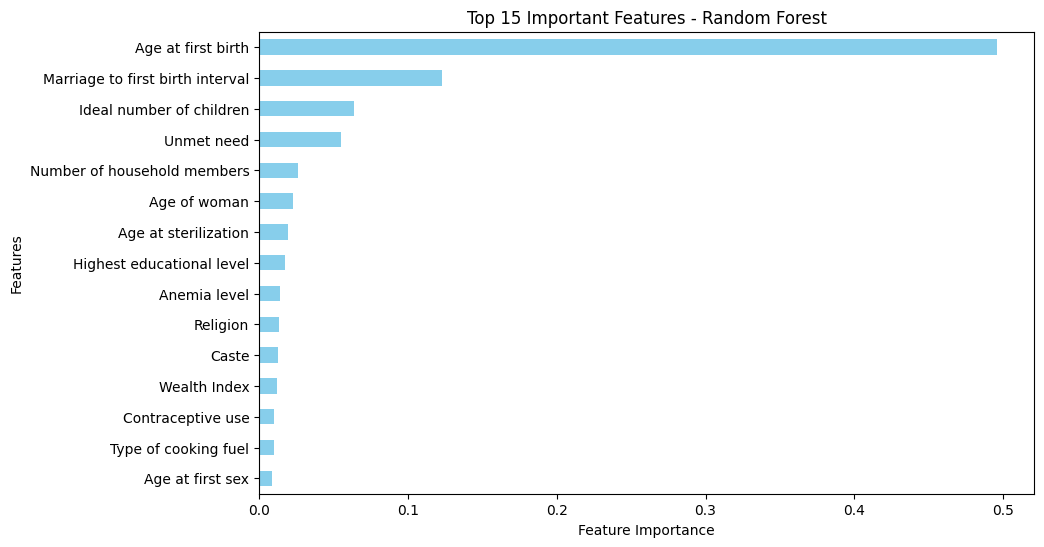

In [ ]:
# random forest feature importance
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataframe and 'target' is 'Number of living children'
X = df.drop(columns=['Number of living children'])
y = df['Number of living children']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Print top 10 important features
print(feature_importances.head(15))

# Visualization: Bar plot for the top 10 important features
top_15_features = feature_importances.head(15)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_15_features.plot(kind='barh', color='skyblue')
plt.title('Top 15 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


# 3.2 Cat boost

In [ ]:
!pip uninstall numpy catboost -y
!pip install --upgrade pip
!pip install numpy catboost

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 164.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [catboost]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


Top 15 Features by CatBoost Importance:
                             Feature  Importance
23                Age at first birth   39.639730
41  Marriage to first birth interval   24.185143
43          Ideal number of children    6.101597
24                      Age of woman    5.530189
27                        Unmet need    4.613939
20       Number of household members    4.429377
1          Highest educational level    2.990892
6               Age at sterilization    2.689351
34          Desire for more children    1.212138
42                  Age at first sex    0.725107
22                      Wealth Index    0.683800
19                          Religion    0.671362
3          Births in last five years    0.601219
21              Type of cooking fuel    0.597729
29                 Wanted last child    0.470670


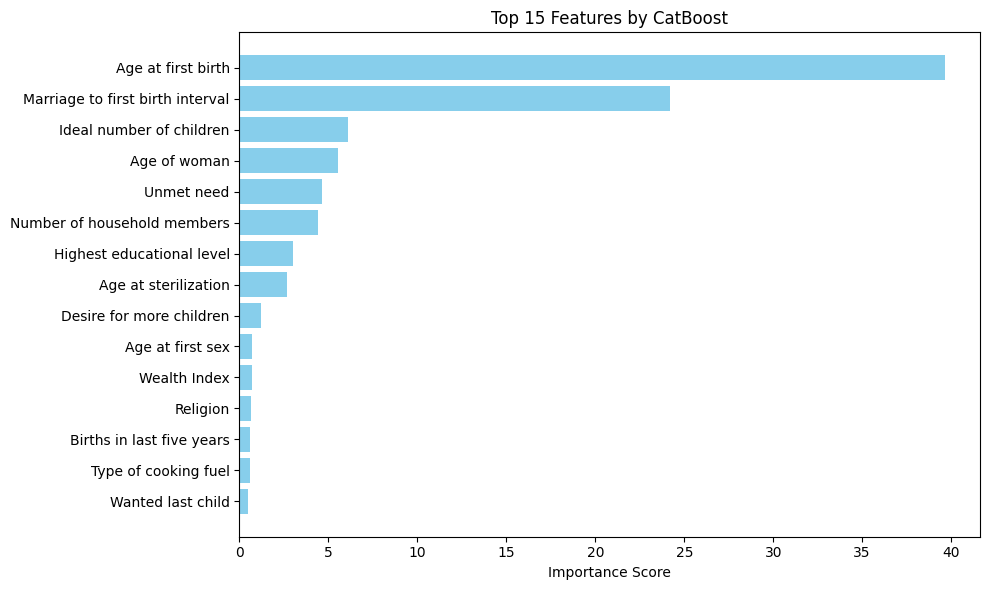

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

# Define target
target_col = 'Number of living children'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical columns (CatBoost supports raw categorical column names)
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize CatBoostRegressor
model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    cat_features=cat_features,
    verbose=0
)

# Fit model (CatBoost handles missing values and categorical features natively)
model.fit(X, y)

# Get feature importance
importances = model.get_feature_importance()
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 features
print("Top 15 Features by CatBoost Importance:")
print(importance_df.head(15))

# Plot top 10 features
plt.figure(figsize=(10, 6))
top_features = importance_df.head(15)
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Top 15 Features by CatBoost")
plt.tight_layout()
plt.show()


# 3.3 XG Boost

Top 15 Features Selected by XGBoost:
Age_at_first_birth                             0.395924
Ideal_number_of_children                       0.103423
Unmet_need                                     0.075361
Desire_for_more_children                       0.044065
Age_of_woman                                   0.043400
Age_at_sterilization                           0.021595
Number_of_household_members                    0.020260
Marriage_to_first_birth_interval               0.016184
Marital_status                                 0.013014
Births_in_last_five_years                      0.012804
Age_at_first_sex                               0.012297
Number_of_children_5_and_under_in_household    0.012181
Wealth_Index                                   0.011615
Highest_educational_level                      0.011373
Type_of_cooking_fuel                           0.011277
dtype: float32


<ipython-input-25-7051da4f9eb7>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15.values, y=top_15.index, palette='viridis')


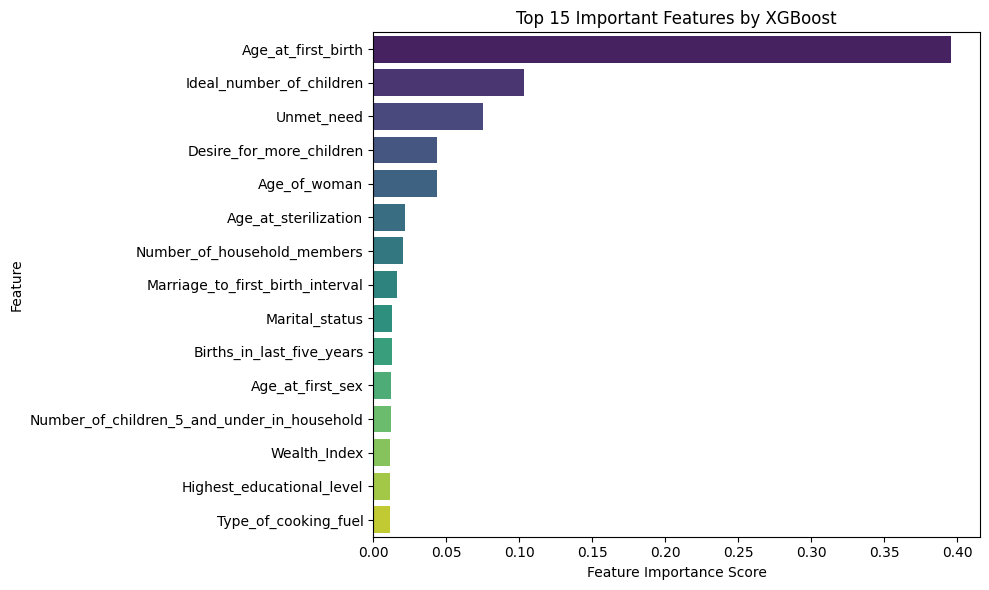

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Copy your original dataframe
df_copy = df.copy()

# Clean column names: remove special characters
df_copy.columns = df_copy.columns.str.replace(r'[\[\]<>]', '', regex=True)

df_copy.columns = df_copy.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

# Proceed with label encoding
for col in df_copy.select_dtypes(include='object').columns:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))

# Split features and target
X = df_copy.drop(columns=['Number_of_living_children'])
y = df_copy['Number_of_living_children']

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    random_state=42,
    tree_method='hist',
    enable_categorical=True
)
xgb_model.fit(X, y)

# Get and plot top 10 feature importances
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
top_15 = importances.sort_values(ascending=False).head(15)

print("Top 15 Features Selected by XGBoost:")
print(top_15)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15.values, y=top_15.index, palette='viridis')
plt.title("Top 15 Important Features by XGBoost")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# 3.4 Light GBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 3271, number of used features: 44
[LightGBM] [Info] Start training from score 1.239071
Top 15 Features from LightGBM:
                             Feature  Importance
23                Age_at_first_birth         249
20       Number_of_household_members         209
19                          Religion         203
1          Highest_educational_level         185
24                      Age_of_woman         185
33                      Anemia_level         175
41  Marriage_to_first_birth_interval         171
6               Age_at_sterilization         149
39                             Caste         139
22                      Wealth_Index         139
35      Husbands_desire_fo

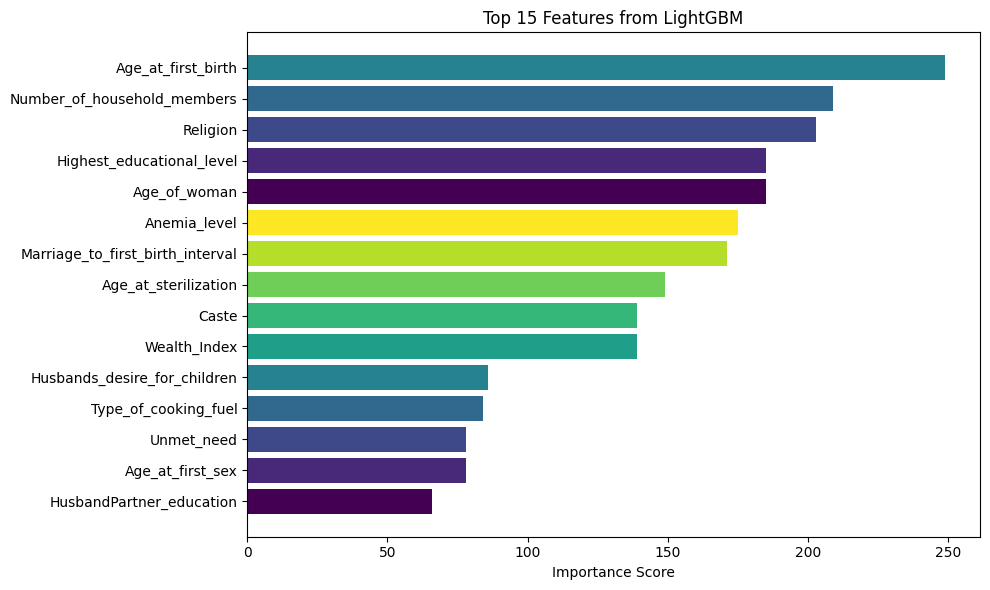

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define your target
target_col = 'Number of living children'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categoricals (LightGBM supports category dtype)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = X.copy()

# Convert to category dtype (LightGBM reads this natively)
for col in categorical_cols:
    X_encoded[col] = X_encoded[col].astype('category')

# Sanitize column names
X_encoded.columns = X_encoded.columns.str.replace(r"[^\w\s]", "", regex=True).str.replace(" ", "_")

# Train LightGBM regressor
model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
model.fit(X_encoded, y)

# Feature importance
importances = model.feature_importances_
feature_names = X_encoded.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 features
print("Top 15 Features from LightGBM:")
print(importance_df.head(15))

# Customize the color palette
# Option 1: Using a color map (e.g., 'viridis')
color_palette = plt.cm.viridis(np.linspace(0, 1, 10))

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1], color=color_palette)
plt.xlabel("Importance Score")
plt.title("Top 15 Features from LightGBM")
plt.tight_layout()
plt.show()


# 3.5 Pearson Rank correlation

Top 15 features most correlated with the target:
Marital status                                           0.607008
Age of woman                                             0.592207
Age at first sex                                         0.522905
Husband/partner age                                      0.392625
Age at sterilization                                     0.307486
Ideal number of children                                 0.287198
Contraceptive use                                        0.222211
Pregnancy end in miscarriage, abortion, or stillbirth    0.197701
Births in last five years                                0.173123
Smoking status                                           0.163147
Respondents occupation                                   0.149351
Number of children 5 and under in household              0.130807
Currently breastfeeding                                  0.126465
Exposure to pregnancy                                    0.119017
Currently has hypertension 

<ipython-input-29-86285b40918a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.head(15).values, y=correlation_with_target.head(15).index, palette="viridis")


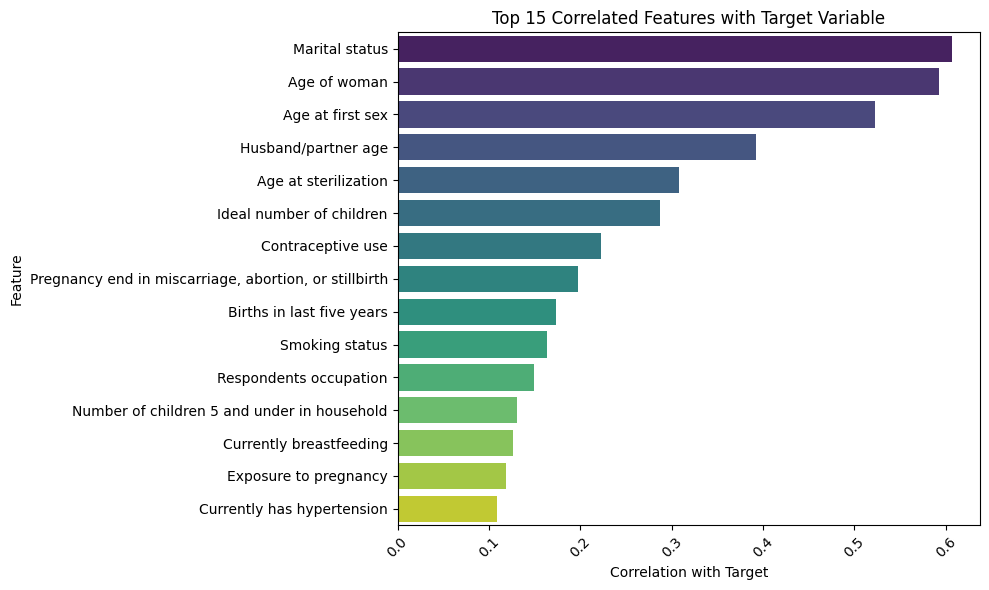

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe and 'target_col' is your target variable
target_col = 'Number of living children'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Create an indicator for missing values (1 if missing, 0 if not)
X_missing = X.isnull().astype(int)

# Combine the original data with the missing value indicators
X_combined = pd.concat([X, X_missing], axis=1)

# Compute the correlation matrix of the features with missing value indicators
correlation_matrix = X_combined.corr()

# Compute the correlation with the target variable from 'y'
correlation_with_target = X.corrwith(y).sort_values(ascending=False)

# Print the top 10 features that are most correlated with the target
print("Top 15 features most correlated with the target:")
print(correlation_with_target.head(15))

# Visualize the correlation with the target using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.head(15).values, y=correlation_with_target.head(15).index, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Correlation with Target")
plt.ylabel("Feature")
plt.title("Top 15 Correlated Features with Target Variable")
plt.tight_layout()
plt.show()


# 3.6 SHAP

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 3271, number of used features: 44
[LightGBM] [Info] Start training from score 1.239071


 97%|=================== | 3167/3271 [00:21<00:00]       

Top 10 Features by SHAP Importance:
                                        Feature  Mean |SHAP value|
23                           Age_at_first_birth           0.751219
24                                 Age_of_woman           0.142746
27                                   Unmet_need           0.090165
20                  Number_of_household_members           0.089679
43                     Ideal_number_of_children           0.077281
41             Marriage_to_first_birth_interval           0.064855
1                     Highest_educational_level           0.054938
6                          Age_at_sterilization           0.041841
34                     Desire_for_more_children           0.031938
40  Number_of_children_5_and_under_in_household           0.023246
42                             Age_at_first_sex           0.021949
22                                 Wealth_Index           0.019674
19                                     Religion           0.019327
21                        

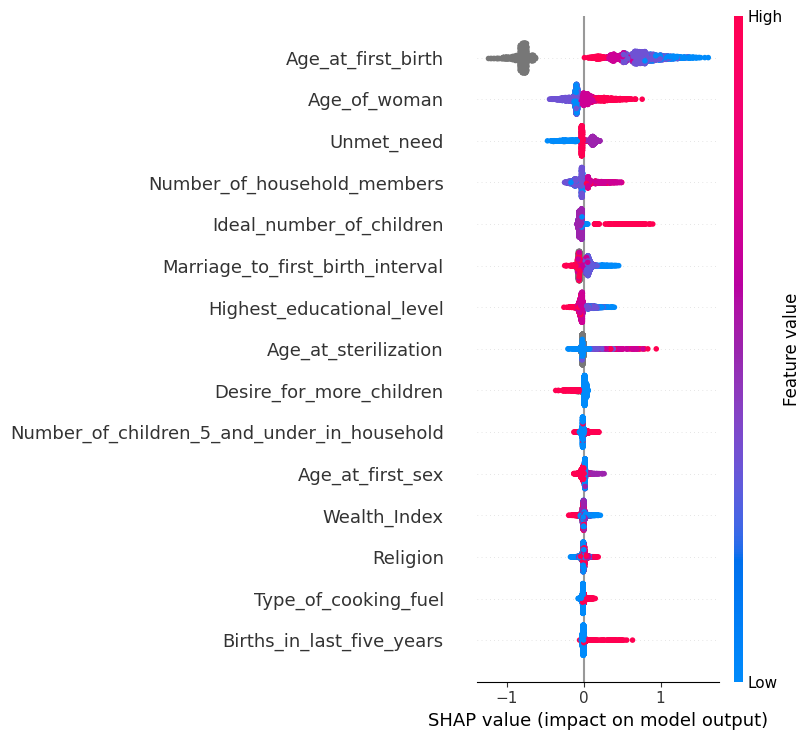

In [ ]:
import pandas as pd
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import numpy as np

# Target column
target_col = 'Number of living children'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Sanitize column names (remove special characters)
X.columns = X.columns.str.replace(r"[^\w\s]", "", regex=True).str.replace(" ", "_")

# Convert categorical columns to 'category' dtype
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = X[col].astype('category')

# Train LightGBM model (can handle missing values)
model = lgb.LGBMRegressor()
model.fit(X, y)

# SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Compute mean absolute SHAP value for each feature
shap_feature_importance = np.abs(shap_values.values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean |SHAP value|': shap_feature_importance
}).sort_values(by='Mean |SHAP value|', ascending=False)

# Print top 10 features
print("Top 10 Features by SHAP Importance:")
print(shap_importance_df.head(15))

# Plot SHAP summary plot
shap.summary_plot(shap_values, X, max_display=15)


# 3.7 permutation importance-RF

Top 15 Features by Permutation Importance:
                             Feature  Importance       Std
23                Age at first birth    0.740951  0.058145
20       Number of household members    0.052298  0.015311
27                        Unmet need    0.043903  0.008422
43          Ideal number of children    0.042616  0.008592
41  Marriage to first birth interval    0.033580  0.010802
24                      Age of woman    0.027351  0.009039
25                    Marital status    0.013079  0.005219
34          Desire for more children    0.010365  0.004226
19                          Religion    0.007508  0.004256
42                  Age at first sex    0.006962  0.002066
33                      Anemia level    0.003569  0.002674
3          Births in last five years    0.003345  0.001310
1          Highest educational level    0.003216  0.006081
31          Source of drinking water    0.002927  0.001168
5    Ever had a terminated pregnancy    0.002165  0.000417


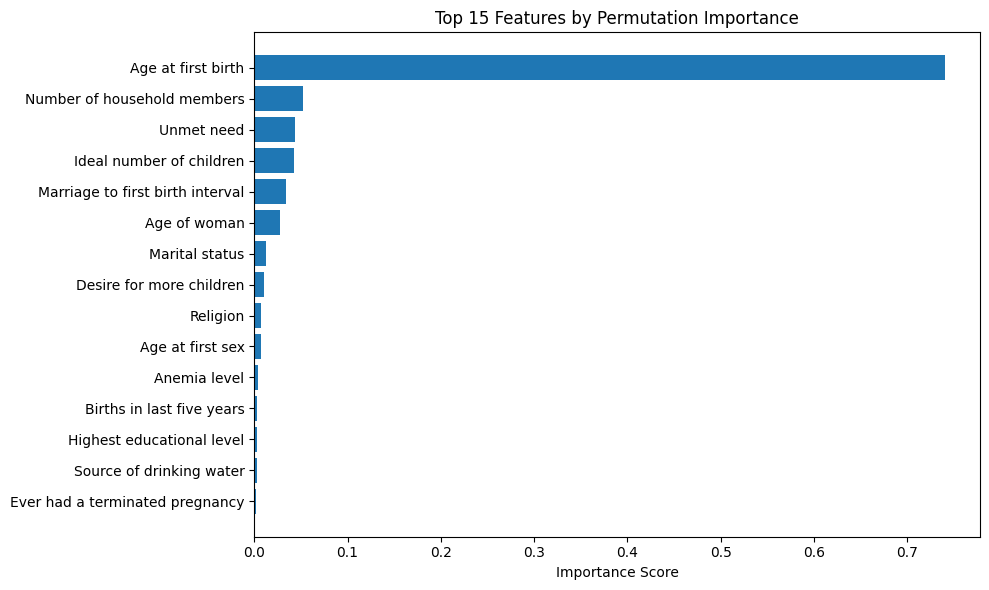

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Assuming 'df' is your DataFrame and 'target_col' is the target variable
target_col = 'Number of living children'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model performance on the original test set
y_pred = model.predict(X_test)
baseline_score = mean_squared_error(y_test, y_pred)

# Perform permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance scores and corresponding feature names
importance_scores = perm_importance.importances_mean
std_scores = perm_importance.importances_std
features = X.columns

# Create a DataFrame with feature importance scores
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance_scores,
    'Std': std_scores
}).sort_values(by='Importance', ascending=False)

# Print top 10 important features
print("Top 15 Features by Permutation Importance:")
print(importance_df.head(15))

# Plot the top 10 features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1])
plt.xlabel("Importance Score")
plt.title("Top 15 Features by Permutation Importance")
plt.tight_layout()
plt.show()


# 3.8 RFE-random forest as estimator

Top 15 Features Selected by RFE with Random Forest:
                             Feature  Importance
6                 Age at first birth    0.559378
12  Marriage to first birth interval    0.072167
14          Ideal number of children    0.064781
9                         Unmet need    0.057293
4        Number of household members    0.032637
7                       Age of woman    0.031892
0          Highest educational level    0.029206
2               Age at sterilization    0.026986
5                       Wealth Index    0.023462
3                           Religion    0.020904
11                             Caste    0.020399
10                      Anemia level    0.020020
8                  Contraceptive use    0.014961
13                  Age at first sex    0.013225
1          Births in last five years    0.012688


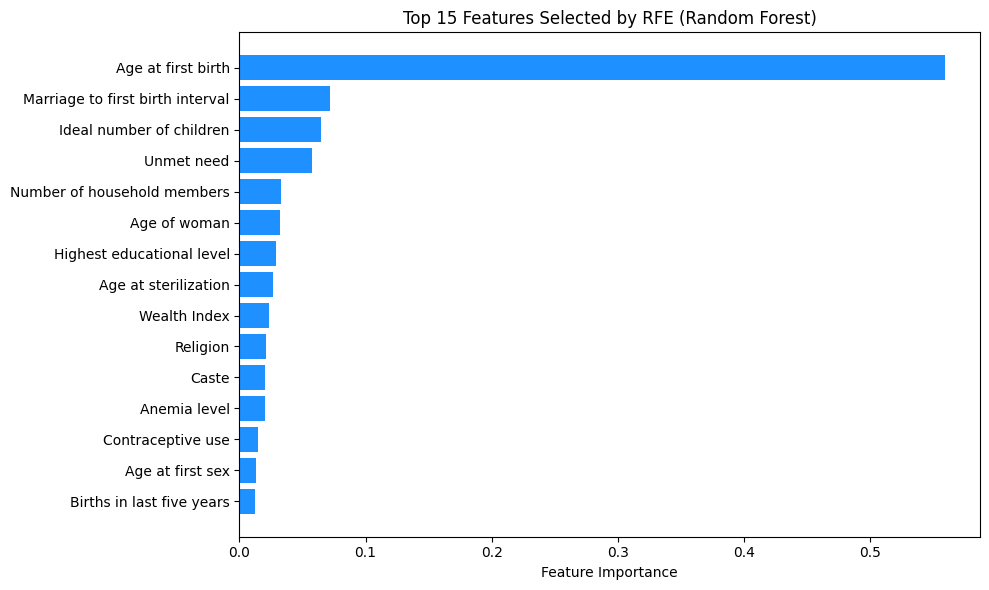

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Set target
target_col = 'Number of living children'

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical columns as category dtype
X_encoded = X.copy()
cat_cols = X_encoded.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    X_encoded[col] = X_encoded[col].astype('category')

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

# Get selected feature names and their importances
selected_features = X_encoded.columns[rfe.support_]
feature_importances = model.fit(X_encoded[selected_features], y).feature_importances_

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 features
print("Top 15 Features Selected by RFE with Random Forest:")
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1], color='dodgerblue')
plt.title("Top 15 Features Selected by RFE (Random Forest)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


# 4) Selecting the 15 most common features for model building

In [ ]:
# Recursive Feature Elimination (RFE)
rfe_features = [
    "Age at first birth",
    "Marriage to first birth interval",
    "Ideal number of children",
    "Unmet need",
    "Number of household members",
    "Age of woman",
    "Highest educational level",
    "Age at sterilization",
    "Wealth Index",
    "Religion",
    "Caste",
    "Anemia level",
    "Contraceptive use",
    "Age at first sex",
    "Births in last five years"
]

# Permutation Importance
permutation_features = [
    "Age at first birth",
    "Number of household members",
    "Unmet need",
    "Ideal number of children",
    "Marriage to first birth interval",
    "Age of woman",
    "Marital status",
    "Desire for more children",
    "Religion",
    "Age at first sex",
    "Anemia level",
    "Births in last five years",
    "Highest educational level",
    "Source of drinking water",
    "Ever had a terminated pregnancy"
]

# SHAP Importance
shap_features = [
    "Age at first birth",
    "Age of woman",
    "Unmet need",
    "Number of household members",
    "Ideal number of children",
    "Marriage to first birth interval",
    "Highest educational level",
    "Age at sterilization",
    "Desire for more children",
    "Number of children under 5 in household",
    "Age at first sex",
    "Wealth Index",
    "Religion",
    "Type of cooking fuel",
    "Births in last five years"
]

# Pearson Correlation
pearson_features = [
    "Marital status",
    "Age of woman",
    "Age at first sex",
    "Husband/partner age",
    "Age at sterilization",
    "Ideal number of children",
    "Contraceptive use",
    "Pregnancy end in miscarriage, abortion, or stillbirth",
    "Births in last five years",
    "Smoking status",
    "Respondents occupation",
    "Number of children 5 and under in household",
    "Currently breastfeeding",
    "Exposure to pregnancy",
    "Currently has hypertension"
]

# LightGBM Importance
lightgbm_features = [
    "Age at first birth",
    "Number of household members",
    "Religion",
    "Highest educational level",
    "Age of woman",
    "Anemia level",
    "Marriage to first birth interval",
    "Age at sterilization",
    "Caste",
    "Wealth Index",
    "Husband's desire for children",
    "Type of cooking fuel",
    "Unmet need",
    "Age at first sex",
    "Husband/Partner education"
]

# CatBoost Importance
catboost_features = [
    "Age at first birth",
    "Marriage to first birth interval",
    "Ideal number of children",
    "Age of woman",
    "Unmet need",
    "Number of household members",
    "Highest educational level",
    "Age at sterilization",
    "Desire for more children",
    "Age at first sex",
    "Wealth Index",
    "Religion",
    "Births in last five years",
    "Type of cooking fuel",
    "Wanted last child"
]

# XGBoost Importance
xgboost_features = [
    "Age at first birth",
    "Ideal number of children",
    "Unmet need",
    "Desire for more children",
    "Age of woman",
    "Age at sterilization",
    "Number of household members",
    "Marriage to first birth interval",
    "Marital status",
    "Births in last five years",
    "Age at first sex",
    "Number of children 5 and under in household",
    "Wealth Index",
    "Highest educational level",
    "Type of cooking fuel"
]

# random forest
randomforest_features=[
    "Age at first birth",
    "Marriage to first birth interval",
    "Ideal number of children",
    "Unmet need",
    "Number of household members",
    "Age of woman",
    "Age at sterilization",
    "Highest educational level",
    "Anemia level",
    "Religion",
    "Caste",
    "Wealth Index",
    "Contraceptive use",
    "Type of cooking fuel",
    "Age at first sex"
]

In [ ]:
# Combine into a dictionary
feature_selection_results = {
    'RandomForest': randomforest_features,
    'CatBoost': catboost_features,
    'XGBoost': xgboost_features,
    'LightGBM': lightgbm_features,
    'PearsonRankCorr': pearson_features,
    'SHAP': shap_features,
    'Permutation': permutation_features,
    'RecursiveFeatureElimination': rfe_features
}

# Convert to DataFrame (columns: method, rows: top features)
comparison_df = pd.DataFrame.from_dict(feature_selection_results, orient='index').transpose()
comparison_df

,RandomForest,CatBoost,XGBoost,LightGBM,PearsonRankCorr,SHAP,Permutation,RecursiveFeatureElimination
0,Age at first birth,Age at first birth,Age at first birth,Age at first birth,Marital status,Age at first birth,Age at first birth,Age at first birth
1,Marriage to first birth interval,Marriage to first birth interval,Ideal number of children,Number of household members,Age of woman,Age of woman,Number of household members,Marriage to first birth interval
2,Ideal number of children,Ideal number of children,Unmet need,Religion,Age at first sex,Unmet need,Unmet need,Ideal number of children
3,Unmet need,Age of woman,Desire for more children,Highest educational level,Husband/partner age,Number of household members,Ideal number of children,Unmet need
4,Number of household members,Unmet need,Age of woman,Age of woman,Age at sterilization,Ideal number of children,Marriage to first birth interval,Number of household members
5,Age of woman,Number of household members,Age at sterilization,Anemia level,Ideal number of children,Marriage to first birth interval,Age of woman,Age of woman
6,Age at sterilization,Highest educational level,Number of household members,Marriage to first birth interval,Contraceptive use,Highest educational level,Marital status,Highest educational level
7,Highest educational level,Age at sterilization,Marriage to first birth interval,Age at sterilization,"Pregnancy end in miscarriage, abortion, or sti...",Age at sterilization,Desire for more children,Age at sterilization
8,Anemia level,Desire for more children,Marital status,Caste,Births in last five years,Desire for more children,Religion,Wealth Index
9,Religion,Age at first sex,Births in last five years,Wealth Index,Smoking status,Number of children under 5 in household,Age at first sex,Religion


In [ ]:
from collections import Counter

# Flatten all selected features into one list
all_selected = sum(feature_selection_results.values(), [])

# Count frequency
feature_counts = Counter(all_selected)

# Convert to DataFrame
freq_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(freq_df.head(15))


                             Feature  Frequency
5                       Age of woman          8
14                  Age at first sex          8
2           Ideal number of children          7
0                 Age at first birth          7
3                         Unmet need          7
4        Number of household members          7
6               Age at sterilization          7
1   Marriage to first birth interval          7
7          Highest educational level          7
9                           Religion          6
11                      Wealth Index          6
16         Births in last five years          6
13              Type of cooking fuel          5
15          Desire for more children          4
8                       Anemia level          4


# 5) Selecting which variables to drop

In [ ]:
# Combine into a dataframe for better readability
missing_info = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)                      #created a df with missing value's count and percentage
missing_info = missing_info[missing_info['Missing Percentage'] > 0]
missing_info


,Missing Count,Missing Percentage
"Pregnancy end in miscarriage, abortion, or stillbirth",3210,98.135127
Had your uterus removed,3084,94.283094
Husband/partner age,2952,90.247631
Husband/partner occupation,2926,89.452767
Husband/Partner education,2926,89.452767
Age at sterilization,2896,88.535616
Respondents occupation,2765,84.530725
Wanted last child,2702,82.604708
Husbands desire for children,1486,45.429532
Marriage to first birth interval,1207,36.900031


In [ ]:
# Step 1: Extract top 10 features from the feature selection
top_15_features = freq_df.head(10)['Feature'].tolist()

# Step 2: Extract all variables that have missing values
missing_vars = missing_info.index.tolist()

# Step 3: Find variables with missing values NOT in top 10 features
missing_not_in_top15 = list(set(missing_vars) - set(top_15_features))

# Step 4: Filter the missing_info DataFrame to only include these variables
missing_not_in_top15_df = missing_info.loc[missing_not_in_top10]

# Step 5: Display the DataFrame
print("Variables with missing values NOT in top 10 features:")
print(missing_not_in_top15_df)


Variables with missing values NOT in top 10 features:
                                                    Missing Count  \
Anemia level                                                  225   
Had your uterus removed                                      3084   
Desire for more children                                       62   
Husband/partner occupation                                   2926   
Pregnancy end in miscarriage, abortion, or stil...           3210   
Contraceptive use                                              83   
Respondents occupation                                       2765   
Caste                                                         117   
Husbands desire for children                                 1486   
Husband/partner age                                          2952   
Husband/Partner education                                    2926   
Wanted last child                                            2702   

                                                

In [ ]:
# Step 1: Extract top 10 features
top_10_features = freq_df.head(10)['Feature'].tolist()

# Step 2: Extract variables with missing values
missing_vars = missing_info.index.tolist()

# Step 3: Find intersection (features that are in both lists)
common_features = list(set(top_15_features) & set(missing_vars))

# Step 4: Filter the missing_info DataFrame to show only those common features
common_missing_df = missing_info.loc[common_features]

# Step 5: Display the DataFrame
print("Top 10 Features That Also Have Missing Values:")
print(common_missing_df)


Top 10 Features That Also Have Missing Values:
                                  Missing Count  Missing Percentage
Age at first birth                         1205           36.838887
Marriage to first birth interval           1207           36.900031
Unmet need                                    4            0.122287
Age at sterilization                       2896           88.535616


# 5.1 Removing the variables that have large missing percentage and not in top 10 features

In [ ]:
# List of columns to drop
columns_to_drop = [
    "Pregnancy end in miscarriage, abortion, or stillbirth",
    "Wanted last child",
    "Husband/partner occupation",
    "Husband/partner age",
    "Had your uterus removed",
    "Husband/Partner education",
    "Respondents occupation",
    "Husbands desire for children"
]

# Drop the columns from the dataset
df_imputed= df.drop(columns=columns_to_drop)
df_imputed


,Type of place of residence,Highest educational level,Sex of household head,Births in last five years,Currently pregnant,Number of living children,Ever had a terminated pregnancy,Age at sterilization,Currently breastfeeding,Currently amenorrheic[no menstrual cycle],...,Electricity facilities,Source of drinking water,Type of toilet facility,Anemia level,Desire for more children,Caste,Number of children 5 and under in household,Marriage to first birth interval,Age at first sex,Ideal number of children
0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0
1,2.0,3.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,1.0,2.0
2,2.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,3.0,2.0
3,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0
4,2.0,2.0,1.0,0.0,0.0,3.0,0.0,NaN,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0
3267,1.0,2.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,2.0,4.0,3.0,2.0
3268,1.0,2.0,2.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,3.0,2.0,3.0,3.0,2.0
3269,1.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,2.0,2.0,NaN,0.0,2.0,2.0,NaN,3.0,1.0
